<a href="https://colab.research.google.com/github/yoonkim97/chestXrayODIN/blob/master/ChestXray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load CSV Data for Training

In [3]:
import pandas as pd 
df1 = pd.read_csv("train_val_list.csv")
print(df1)

            Image Index  Follow-up #  ...  Pleural_Thickening  Hernia
0      00000001_000.png            0  ...                   0       0
1      00000001_001.png            1  ...                   0       0
2      00000001_002.png            2  ...                   0       0
3      00000002_000.png            0  ...                   0       0
4      00000004_000.png            0  ...                   0       0
...                 ...          ...  ...                 ...     ...
86519  00030789_000.png            0  ...                   0       0
86520  00030793_000.png            0  ...                   0       0
86521  00030795_000.png            0  ...                   1       0
86522  00030801_000.png            0  ...                   0       0
86523  00030801_001.png            1  ...                   0       0

[86524 rows x 25 columns]


In [4]:
print(df1['No Finding'])

0        0
1        0
2        0
3        1
4        0
        ..
86519    0
86520    0
86521    0
86522    1
86523    0
Name: No Finding, Length: 86524, dtype: int64


Filter out healthy lungs for Training data

In [5]:
print(df1[(df1['No Finding'] == 1)])

            Image Index  Follow-up #  ...  Pleural_Thickening  Hernia
3      00000002_000.png            0  ...                   0       0
5      00000005_000.png            0  ...                   0       0
6      00000005_001.png            1  ...                   0       0
7      00000005_002.png            2  ...                   0       0
8      00000005_003.png            3  ...                   0       0
...                 ...          ...  ...                 ...     ...
86491  00030753_009.png            9  ...                   0       0
86503  00030770_000.png            0  ...                   0       0
86505  00030770_002.png            2  ...                   0       0
86506  00030772_000.png            0  ...                   0       0
86522  00030801_000.png            0  ...                   0       0

[50500 rows x 25 columns]


Save the filtered out dataframe to a new csv file (Training)


In [0]:
train_df = df1[(df1['No Finding'] == 1)]
train_df.to_csv('train.csv')

Load CSV Data for Testing

In [7]:
df2 = pd.read_csv("test_list.csv")
print(df2)

            Image Index  Follow-up #  ...  Pleural_Thickening  Hernia
0      00000003_000.png            0  ...                   0       1
1      00000003_001.png            1  ...                   0       1
2      00000003_002.png            2  ...                   0       1
3      00000003_003.png            3  ...                   0       1
4      00000003_004.png            4  ...                   0       1
...                 ...          ...  ...                 ...     ...
25591  00030800_000.png            0  ...                   0       0
25592  00030802_000.png            0  ...                   0       0
25593  00030803_000.png            0  ...                   0       0
25594  00030804_000.png            0  ...                   0       0
25595  00030805_000.png            0  ...                   0       0

[25596 rows x 25 columns]


Filter out unhealthy lungs for Testing data

In [8]:
print(df2[(df2['No Finding'] == 0)])

            Image Index  Follow-up #  ...  Pleural_Thickening  Hernia
0      00000003_000.png            0  ...                   0       1
1      00000003_001.png            1  ...                   0       1
2      00000003_002.png            2  ...                   0       1
3      00000003_003.png            3  ...                   0       1
4      00000003_004.png            4  ...                   0       1
...                 ...          ...  ...                 ...     ...
25466  00030637_022.png           22  ...                   0       0
25467  00030637_023.png           23  ...                   0       0
25498  00030674_000.png            0  ...                   0       0
25501  00030677_000.png            0  ...                   0       0
25516  00030692_000.png            0  ...                   0       0

[15735 rows x 25 columns]


Save the filtered dataframe to a new CSV file (Testing)

In [0]:
test_df = df2[(df2['No Finding'] == 0)]
test_df.to_csv('test.csv')

In [13]:
import os 
# RETRIEVE IMAGES FROM FOLDER
path = "images/"
images = []
for file in os.listdir(path):
    if file.lower().endswith(".png"):
        images.append(file)
print(images)

['00000010_000.png', '00000005_002.png', '00000009_000.png', '00000002_000.png', '00000004_000.png', '00000003_002.png', '00000001_001.png', '00000003_006.png', '00000005_004.png', '00000005_003.png', '00000003_005.png', '00000005_007.png', '00000005_000.png', '00000003_001.png', '00000001_000.png', '00000003_003.png', '00000003_007.png', '00000008_002.png', '00000007_000.png', '00000006_000.png']


In [14]:
df3 = pd.read_csv('test.csv')
print(df3)

       Unnamed: 0       Image Index  ...  Pleural_Thickening  Hernia
0               0  00000003_000.png  ...                   0       1
1               1  00000003_001.png  ...                   0       1
2               2  00000003_002.png  ...                   0       1
3               3  00000003_003.png  ...                   0       1
4               4  00000003_004.png  ...                   0       1
...           ...               ...  ...                 ...     ...
15730       25466  00030637_022.png  ...                   0       0
15731       25467  00030637_023.png  ...                   0       0
15732       25498  00030674_000.png  ...                   0       0
15733       25501  00030677_000.png  ...                   0       0
15734       25516  00030692_000.png  ...                   0       0

[15735 rows x 26 columns]


In [15]:
print(df3['Image Index'])

0        00000003_000.png
1        00000003_001.png
2        00000003_002.png
3        00000003_003.png
4        00000003_004.png
               ...       
15730    00030637_022.png
15731    00030637_023.png
15732    00030674_000.png
15733    00030677_000.png
15734    00030692_000.png
Name: Image Index, Length: 15735, dtype: object


In [0]:
images_indices = df3['Image Index']

In [0]:
both = []
for i in range(len(images)):
  for j in range(len(images_indices)):
    if (images[i] == str(images_indices[j])):
      both.append(images[i])

['00000003_002.png', '00000003_006.png', '00000003_005.png', '00000003_001.png', '00000003_003.png', '00000003_007.png'] 6


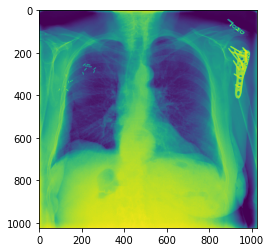

In [25]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

print(both, len(both))
for name in both:
  img=mpimg.imread('images/' + name)
  imgplot = plt.imshow(img)
plt.show()